In [1]:
import ss
import datagen
import covnet
import final_stage
import tensorflow as tf

In [2]:
PATH = r'../squirrel_data\images\456a0750-Squirrel.jpg'

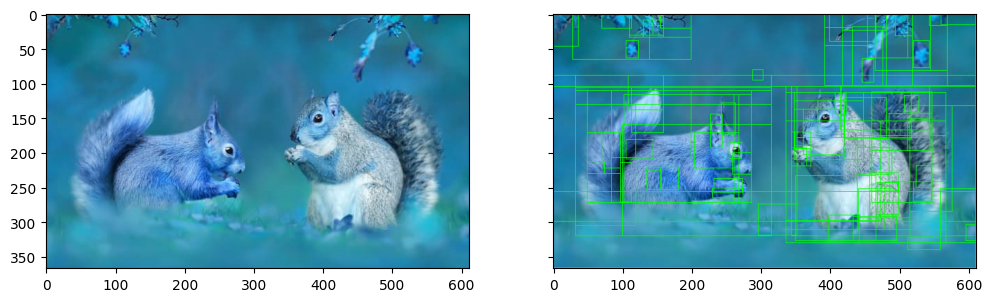

In [7]:
ss.ss_display(PATH)

In [4]:
xpath = '..\squirrel_data\images'
ypath = '..\squirrel_data\labels'

In [5]:
model_save = 'cnn.keras'
cnn_save = tf.keras.callbacks.ModelCheckpoint(model_save, save_weights_only = False)

In [6]:
cnn_data = datagen.BoxDataGen(xpath, ypath, 1)

In [8]:
model = covnet.cnn_features(0, True)
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy')
model.fit(cnn_data, callbacks = [cnn_save])

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 2.7552


Used for Fine tuning (training CNN). Adjust number for trainable layers.

In [9]:
model = covnet.cnn_features(0, False, model_save)
temp_pred = model.predict(cnn_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [10]:
print(len(temp_pred[0]))
print(len(temp_pred))

50176
26


Using Mobilenet instead of VGG since it's lightweight. So output dimensions different. And seems only one bounding box in high enough cover. Also len = 26 is number of bounding boxes.

In [11]:
x_flat, y_bin, dim_gt, dim_pred = final_stage.covnet_preds(xpath, ypath, model_save)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Above are inputs for SVM and Lin regression inputs. X_flat is covnet output, y is binary of positive or negative if image is present in each bb, dim_gt is gt x, y, w, h, and dim_pred is selective search x, y, w, h.

See below

In [12]:
y_bin # if image in (1 class in box) or not (0) - based on IOU

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]

In [13]:
x_flat # For each bounding box

[array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0.05832555, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0.7273413, 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float3

In [14]:
dim_gt # (Only used one y with one box, so same vals - Used for each bb. Might be better computationally to use dict, but it's fine) This is in Yolo Format wherein x, y are centre and w h are full.

[[166.7862562289861, 128.9968051118211, 84.68271256987178, 130.6070287539936],
 [166.7862562289861, 128.9968051118211, 84.68271256987178, 130.6070287539936],
 [166.7862562289861, 128.9968051118211, 84.68271256987178, 130.6070287539936],
 [166.7862562289861, 128.9968051118211, 84.68271256987178, 130.6070287539936],
 [166.7862562289861, 128.9968051118211, 84.68271256987178, 130.6070287539936],
 [166.7862562289861, 128.9968051118211, 84.68271256987178, 130.6070287539936],
 [166.7862562289861, 128.9968051118211, 84.68271256987178, 130.6070287539936],
 [166.7862562289861, 128.9968051118211, 84.68271256987178, 130.6070287539936],
 [166.7862562289861, 128.9968051118211, 84.68271256987178, 130.6070287539936],
 [166.7862562289861, 128.9968051118211, 84.68271256987178, 130.6070287539936],
 [166.7862562289861, 128.9968051118211, 84.68271256987178, 130.6070287539936],
 [166.7862562289861, 128.9968051118211, 84.68271256987178, 130.6070287539936],
 [166.7862562289861, 128.9968051118211, 84.682712569

In [15]:
dim_pred # selective search box preds

[(164, 66, 46, 101),
 (11, 66, 41, 120),
 (147, 140, 27, 43),
 (38, 99, 52, 98),
 (125, 68, 87, 131),
 (11, 66, 94, 131),
 (65, 75, 27, 37),
 (125, 94, 24, 37),
 (164, 66, 46, 103),
 (159, 152, 53, 46),
 (31, 67, 32, 69),
 (216, 154, 7, 33),
 (128, 68, 84, 131),
 (191, 118, 15, 51),
 (15, 0, 57, 38),
 (0, 0, 223, 223),
 (77, 97, 28, 50),
 (69, 156, 36, 35),
 (128, 68, 60, 102),
 (38, 75, 67, 122),
 (132, 150, 22, 49),
 (128, 68, 84, 130),
 (153, 0, 46, 48),
 (125, 66, 87, 133),
 (74, 144, 27, 17),
 (38, 97, 67, 100)]

In [16]:
svm_save = 'svm.pkl'
lin_save = 'lin.pkl'

In [ ]:
# svm_fit = final_stage.SVM(x_flat, y_bin, True, svm_save)
svm_load = final_stage.SVM(x_flat, y_bin, False, svm_save)

In [ ]:
# lin_fit = final_stage.lin_regr(x_flat, dim_gt, dim_pred, True, lin_save)
lin_load = final_stage.lin_regr(x_flat, dim_gt, dim_pred, False, lin_save)

Putting model in action (predicting). Using the same one image in predicting for ease.

In [20]:
test_data = datagen.BoxDataGen(xpath, None, 1)
model = covnet.cnn_features(0, False, model_save)
temp_preds = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [21]:
svm_mdl = final_stage.SVM(None, None, False, svm_save)

In [24]:
obj_pred = svm_mdl.predict(temp_preds)

In [25]:
obj_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

Ok, so predictions are very bad (all zero class). Suppose it's because SVM hasn't trained on much. But strange given it's fitted on the input data, so should really be 100% 1 class.

In [26]:
lin_mdl = final_stage.lin_regr(None, None, None, False, lin_save)

In [27]:
dim_preds = lin_mdl.predict(temp_preds)

In [28]:
dim_preds

array([[38.345104  ,  3.8078527 , 41.032223  , 80.454865  ],
       [48.940697  ,  1.3144865 , 38.460308  , 78.36531   ],
       [49.535576  ,  1.0735359 , 40.95515   , 85.56035   ],
       [60.963226  , -3.9489129 , 31.803205  , 73.34995   ],
       [43.905525  ,  2.9883318 , 30.74462   , 77.48568   ],
       [63.864944  , -5.3305664 , 31.589046  , 72.27057   ],
       [41.317337  ,  3.361786  , 40.691177  , 80.25371   ],
       [44.445427  , -4.43933   , 41.760742  , 82.70805   ],
       [39.118176  ,  3.752183  , 40.84064   , 79.81116   ],
       [65.46022   , -7.0183153 , 26.457842  , 67.70225   ],
       [48.036633  , -0.35608816, 39.667908  , 78.55213   ],
       [67.156784  , -2.7338023 , 30.066595  , 65.96614   ],
       [44.613342  ,  4.5636406 , 31.541908  , 78.857796  ],
       [44.13428   ,  3.3653307 , 40.88177   , 79.29066   ],
       [81.13841   , 12.503966  , 35.966576  , 82.88334   ],
       [72.01724   , -3.126558  , 20.940828  , 69.28782   ],
       [49.673866  ,  0.

The above are differenced values, so we have to add to selective search for gt. y is not actually negative. Differencing however is very bad, i.e., x, w, h vals are very large. It makes model bad - really because of lack of traiing data is cause.

In [30]:
bbs = ss.selective_search(PATH)[1]

In [31]:
bbs

[(164, 66, 46, 101),
 (11, 66, 41, 120),
 (147, 140, 27, 43),
 (38, 99, 52, 98),
 (125, 68, 87, 131),
 (11, 66, 94, 131),
 (65, 75, 27, 37),
 (125, 94, 24, 37),
 (164, 66, 46, 103),
 (159, 152, 53, 46),
 (31, 67, 32, 69),
 (216, 154, 7, 33),
 (128, 68, 84, 131),
 (191, 118, 15, 51),
 (15, 0, 57, 38),
 (0, 0, 223, 223),
 (77, 97, 28, 50),
 (69, 156, 36, 35),
 (128, 68, 60, 102),
 (38, 75, 67, 122),
 (132, 150, 22, 49),
 (128, 68, 84, 130),
 (153, 0, 46, 48),
 (125, 66, 87, 133),
 (74, 144, 27, 17),
 (38, 97, 67, 100)]

In [ ]:
def simple_iou(d, b):
    dim_xmin = d[0][0] + b[0][0]
    dim_ymax = d[0][1] + b[0][1]
    dim_xmax = d[0][0] + d[0][2] + b[0][2]
    dim_ymin = d[0][1] + d[0][3] + b[0][3]

    best_box = []

    for idx, i in enumerate(d[1:]):
        d_xmin = i[0] + b[idx + 1][0]
        d_ymax = i[1] + b[idx + 1][1]
        d_xmax = i[0] + i[2] + b[idx + 1][2]
        d_ymin = i[1] + i[3] + b[idx + 1][3]
        i1 = min(d_xmax, dim_xmax) - max(d_xmin, dim_xmin)
        i2 = min(d_ymax, dim_ymax) - max(d_ymin, dim_ymin)
        intersection = i1 * i2

        b1 = (d_xmax - d_xmin) * (d_ymax - d_ymin)
        b2 = (dim_xmax - dim_xmin) * (dim_ymax - dim_ymin)

        union = b1 + b2 - intersection
        iou = intersection / union
        if iou < 0.5:
            best_box.append(iou)
        print(iou)

simple_iou(dim_preds, bbs)

-0.983068675228343
-5.398330692313157
-2.681557082561033
-10.923956727745493
-0.6069002059382441
-5.378477699933595
-46.523135017935054
1.0297808114295666
-2.0429379898645275
-2.338264826901138
-0.9555458239698585
-23.334363690257426
-3.0872492676881835
-0.9610741146557822
-0.26494382715619497
-15.208405917154348
-127.70200149386153
2.4311346858575695
-1.238810266546342
-3.6691235402634534
-21.651208771187903
-5.956318829034765
-10.246666559294354
-8.02490969939419
-2.1450526651041737


Simplistic IOU and NMS above. Not good, but I'm not running/ using this model. Just implemnting the RCNN paper, so optimizing + useability not required.

We can see negative iou's above, showing predictions are bad. We just need more data.